# Libraries 

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.special import i0
from numpy import exp, sin, cos
import seaborn as sns
import matplotlib as mpl
import os
from pathlib import Path
from statsFuncs import mean_confidence_interval as ms
from statsFuncs import compDistributions
import scipy
import random

mpl.rcParams['axes.linewidth'] = 2

# Paths 

In [38]:
fig3_path = os.getcwd()
figures_path = str(Path(fig3_path).parent)
datapath = figures_path + '/data/naive_subjects/Analysis9_29_2020/gaussian_kernel/'

# Plot params

In [39]:
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['font.serif'] = 'Myriad Pro'
mpl.rcParams['font.weight'] = 'medium'
mpl.rcParams['font.size'] = 16
mpl.rcParams['axes.labelweight'] = 'medium'

# Subject params 

In [40]:
files = folders = 0

for _, dirnames, filenames in os.walk(datapath):
  # ^ this idiom means "we won't be using this value"
    files += len(filenames)
    folders += len(dirnames)

print("{:,} files, {:,} folders".format(files, folders))
print(str(folders-1) + ' subjects')
nSubjects = folders-1

89 files, 12 folders
11 subjects


In [41]:
subject_names = ['AR', 'CK', 'CT', 'EW', 'HL', 'IS', 'JP', 'MF', 'NC', 'SK', 'SS']


# Load data 

In [42]:
alldata = pd.DataFrame(columns=['SUBJECT', 'trialNumber', 'shifted_stimulusID', 'shifted_morphID', 'Error', 'responseError'])
# alldata_trimed = pd.DataFrame(columns=['SUBJECT', 'AVG_RESPONSE_ERROR'])

row = 0
for subject in subject_names:
    subjectdata_temp = pd.DataFrame()
    print(subject)
    
    # load data:
    subjectdata = pd.read_csv(datapath + subject + '/' + subject + '_VM_output_1nBack.csv')
    subjectdata_temp = subjectdata[['trialNumber', 'shifted_stimulusID', 'shifted_morphID', 'Error', 'responseError']]
    subjectdata_temp = subjectdata_temp[(subjectdata_temp['trialNumber'] >= 1) & (subjectdata_temp['trialNumber'] <= 184)]
    print(len(subjectdata_temp))
    subjectdata_temp.loc[:, 'SUBJECT'] = subject
    

    if subject == 'AR':
        alldata = subjectdata_temp
    else:
        alldata = pd.concat([alldata, subjectdata_temp])
    
    row += 1
    
alldata['responseError'] = abs(alldata['responseError'])
alldata['Error'] = abs(alldata['Error'])



AR
247
CK
246
CT
248
EW
249
HL
249
IS
248
JP
249
MF
247
NC
250
SK
246
SS
249


# Polar plot

## Means per location 

In [43]:
# we have 147 locations
by_loc_by_subject = alldata.groupby(by=['SUBJECT', 'shifted_stimulusID'], as_index=False).mean()
by_loc_by_subject

,SUBJECT,shifted_stimulusID,trialNumber,shifted_morphID,Error,responseError
0,AR,1.0,18.000000,136.000000,11.000000,10.000000
1,AR,2.0,36.000000,141.000000,7.000000,6.996309
2,AR,3.0,55.000000,6.000000,3.000000,3.000000
3,AR,4.0,58.333333,51.333333,2.666667,2.666667
4,AR,5.0,31.000000,7.000000,2.000000,2.000000
...,...,...,...,...,...,...
1458,SS,142.0,36.000000,9.000000,13.000000,13.000000
1459,SS,143.0,82.000000,11.500000,14.500000,14.499160
1460,SS,144.0,43.500000,73.500000,2.500000,2.500000
1461,SS,146.0,50.333333,96.000000,3.333333,3.333333


## Corrected Error 

In [44]:
# alldata.dropna(inplace=True)
shifted_stimulus_df = pd.DataFrame(columns=['shifted_stimulusID', 'responseError', 'responseError_SEM'])

row=0

for stimulus in alldata.shifted_stimulusID.unique():
    
    tmp = alldata[alldata['shifted_stimulusID'] == stimulus]
    
    mean_stimulus, sem_stimulus = ms.mean_sem_returnsem(tmp['responseError'])
    
    shifted_stimulus_df.loc[row, 'shifted_stimulusID'] = stimulus
    shifted_stimulus_df.loc[row, 'responseError'] = mean_stimulus
    shifted_stimulus_df.loc[row, 'responseError_SEM'] = sem_stimulus
    
    row += 1
    
shifted_stimulus_df.sort_values(by=['shifted_stimulusID'], inplace=True)
shifted_stimulus_df.reset_index(drop=True, inplace=True)

In [45]:
theta = []
for deg in shifted_stimulus_df.shifted_stimulusID.unique():
    theta.append(np.pi / 73.5 * deg)
label_stimuluss = [str(i) for i in shifted_stimulus_df['shifted_stimulusID'].astype('int')]

# x = np.arange(0, len(theta), step =10)
x = np.arange(4, len(theta), step=5)
x = np.insert(x, 0, 0)
new_ticks = list()
new_label_stimuluss = list()

for i in x:
    new_ticks.append(theta[i])
    new_label_stimuluss.append(label_stimuluss[i])


In [46]:
plt.rcParams['font.family'] = 'Myriad Pro'
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


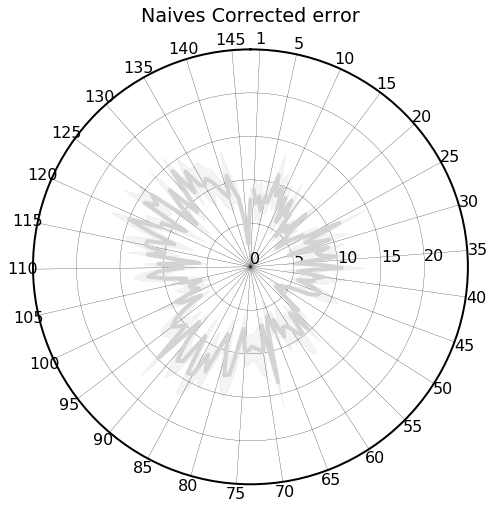

In [47]:

    # create figure
plt.figure(figsize=(8, 8))
ax = plt.axes(polar=True)
df= shifted_stimulus_df[['responseError']]
df_error = shifted_stimulus_df[['responseError_SEM']]
df_reset_index = df.reset_index(drop=True)
df.index = [theta[location] for location in df.index]
df.plot(ax=ax, lw=4, color=['lightgrey'])

ax.fill_between(np.asarray(theta), np.asarray(df_reset_index['responseError'] - df_error['responseError_SEM'], dtype='float'), 
                np.asarray(df_reset_index['responseError'] + df_error['responseError_SEM'], dtype='float'), color='gainsboro', alpha=0.3)
ax.set_theta_zero_location("N")
ax.set_xticks(new_ticks)
ax.set_xticklabels(labels=new_label_stimuluss)

# plt.thetagrids(np.arange(0, 360, 60), labels=new_label_stimuluss)
plt.grid(color='black', linewidth=0.25)
plt.ylim([0, 25])
ax.set_facecolor('white')
ax.set_theta_direction(-1)
ax.get_legend().remove()
ax.set_rlabel_position(89)
ax.set_yticks(np.arange(0, 25, step=5))
plt.title('Naives Corrected error')
plt.savefig('CorrectedErr_naives.eps', dpi=3000)
plt.savefig('CorrectedErr_naives.pdf', format='pdf', dpi=3000, transparent=True)

plt.show()

## Non-corrected error 

In [48]:
# alldata.dropna(inplace=True)
shifted_stimulus_df = pd.DataFrame(columns=['shifted_stimulusID', 'Error', 'Error_SEM'])

row=0

for stimulus in alldata.shifted_stimulusID.unique():
    
    tmp = alldata[alldata['shifted_stimulusID'] == stimulus]
    
    mean_stimulus, sem_stimulus = ms.mean_sem_returnsem(tmp['Error'])
    
    shifted_stimulus_df.loc[row, 'shifted_stimulusID'] = stimulus
    shifted_stimulus_df.loc[row, 'Error'] = mean_stimulus
    shifted_stimulus_df.loc[row, 'Error_SEM'] = sem_stimulus
    
    row += 1
    
shifted_stimulus_df.sort_values(by=['shifted_stimulusID'], inplace=True)
shifted_stimulus_df.reset_index(drop=True, inplace=True)

In [49]:
theta = []
for deg in shifted_stimulus_df.shifted_stimulusID.unique():
    theta.append(np.pi / 73.5 * deg)
label_stimuluss = [str(i) for i in shifted_stimulus_df['shifted_stimulusID'].astype('int')]

# x = np.arange(0, len(theta), step =10)
x = np.arange(4, len(theta), step=5)
x = np.insert(x, 0, 0)
new_ticks = list()
new_label_stimuluss = list()

for i in x:
    new_ticks.append(theta[i])
    new_label_stimuluss.append(label_stimuluss[i])


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


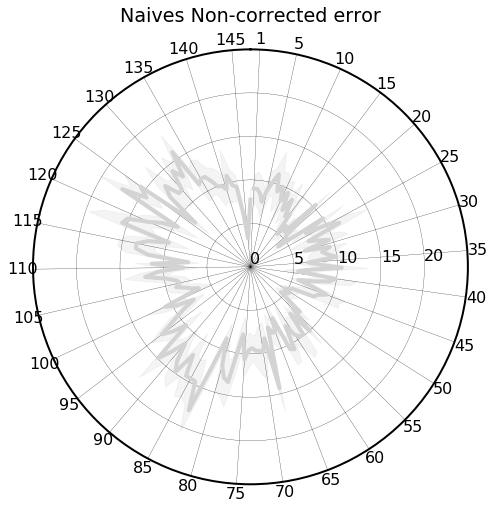

In [50]:

    # create figure
plt.figure(figsize=(8, 8))
ax = plt.axes(polar=True)
df= shifted_stimulus_df[['Error']]
df_error = shifted_stimulus_df[['Error_SEM']]
df_reset_index = df.reset_index(drop=True)
df.index = [theta[location] for location in df.index]
df.plot(ax=ax, lw=4, color=['lightgrey'])

ax.fill_between(np.asarray(theta), np.asarray(df_reset_index['Error'] - df_error['Error_SEM'], dtype='float'), 
                np.asarray(df_reset_index['Error'] + df_error['Error_SEM'], dtype='float'), color='gainsboro', alpha=0.3)
ax.set_theta_zero_location("N")
ax.set_xticks(new_ticks)
ax.set_xticklabels(labels=new_label_stimuluss)

# plt.thetagrids(np.arange(0, 360, 60), labels=new_label_stimuluss)
plt.grid(color='black', linewidth=0.25)
plt.ylim([0, 25])
ax.set_facecolor('white')
ax.set_theta_direction(-1)
ax.get_legend().remove()
ax.set_rlabel_position(89)
ax.set_yticks(np.arange(0, 25, step=5))
plt.title('Naives Non-corrected error')
plt.savefig('NonCorrectedErr_naives.eps', format='eps', dpi=3000, transparent=True)
plt.savefig('NonCorrectedErr_naives.svg', format='svg', dpi=3000, transparent=True)
plt.savefig('NonCorrectedErr_naives.pdf', format='pdf', dpi=3000, transparent=True)

plt.show()

In [51]:
col = by_loc_by_subject.loc[: , "Error":"responseError"]
by_loc_by_subject['mean_errors'] = col.mean(axis=1)

In [52]:
sum(by_loc_by_subject['Error'] < by_loc_by_subject['responseError'])/len(by_loc_by_subject)

0.2077922077922078

In [53]:
by_loc_by_subject

,SUBJECT,shifted_stimulusID,trialNumber,shifted_morphID,Error,responseError,mean_errors
0,AR,1.0,18.000000,136.000000,11.000000,10.000000,10.500000
1,AR,2.0,36.000000,141.000000,7.000000,6.996309,6.998155
2,AR,3.0,55.000000,6.000000,3.000000,3.000000,3.000000
3,AR,4.0,58.333333,51.333333,2.666667,2.666667,2.666667
4,AR,5.0,31.000000,7.000000,2.000000,2.000000,2.000000
...,...,...,...,...,...,...,...
1458,SS,142.0,36.000000,9.000000,13.000000,13.000000,13.000000
1459,SS,143.0,82.000000,11.500000,14.500000,14.499160,14.499580
1460,SS,144.0,43.500000,73.500000,2.500000,2.500000,2.500000
1461,SS,146.0,50.333333,96.000000,3.333333,3.333333,3.333333


# Count plots 

## Per subject 

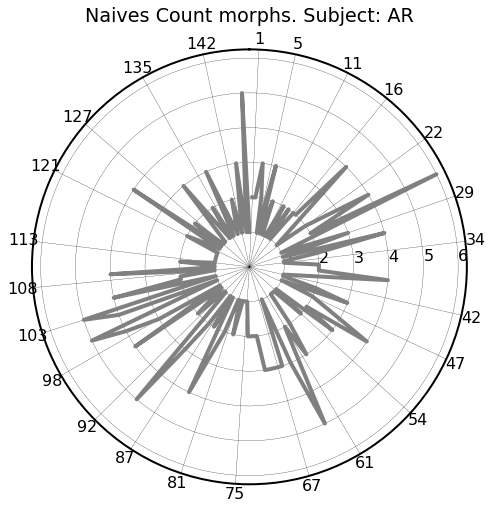

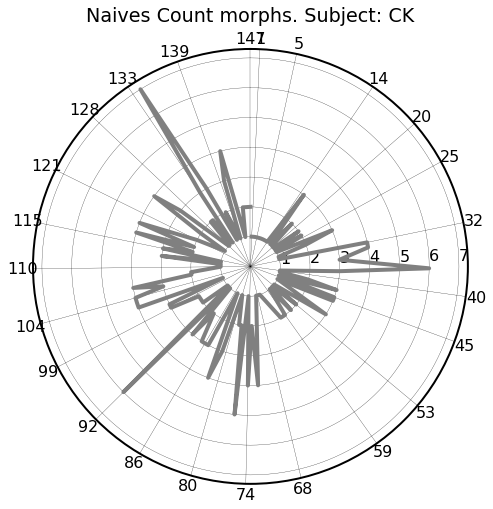

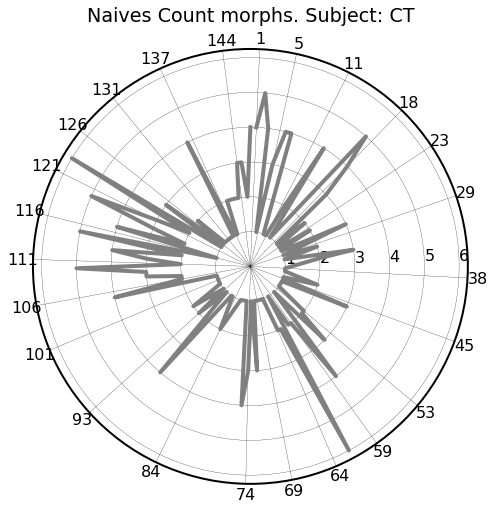

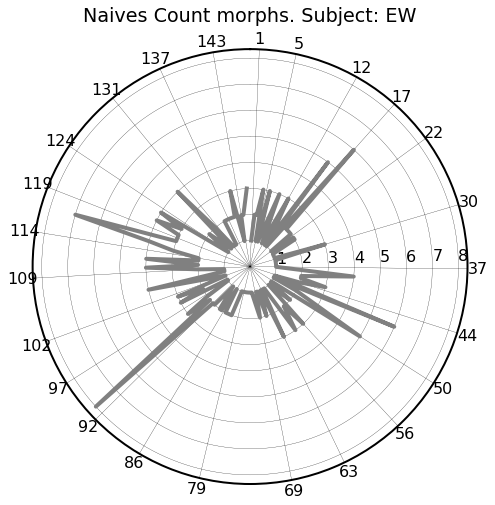

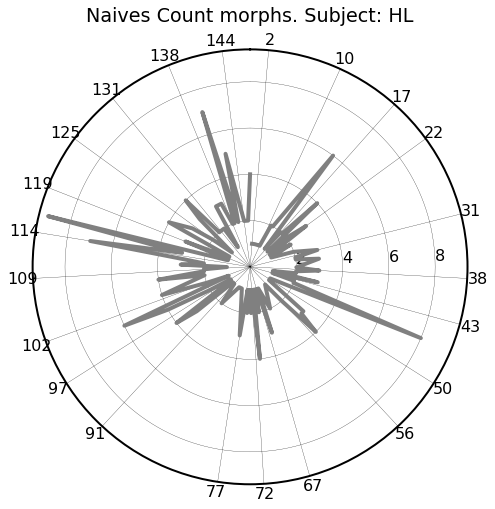

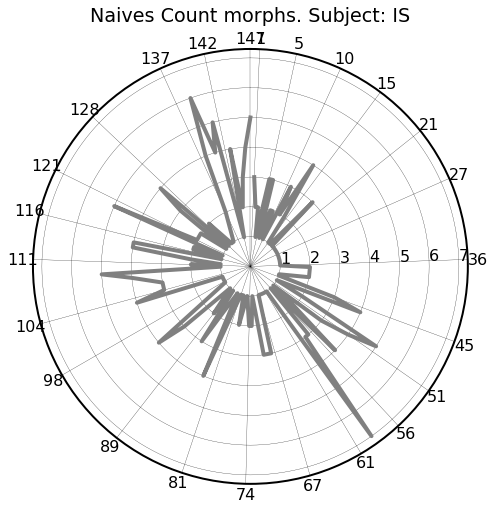

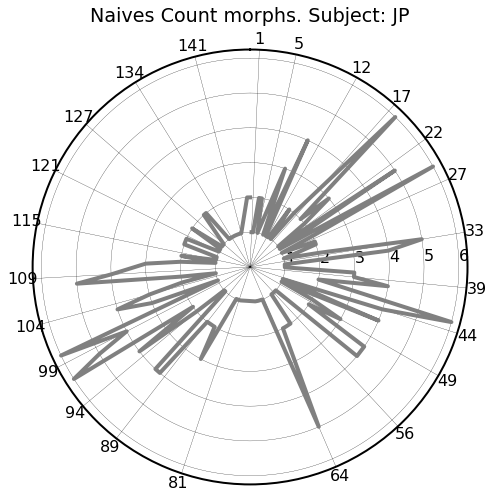

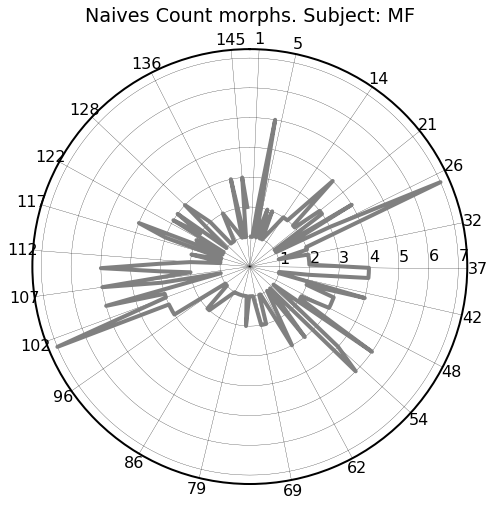

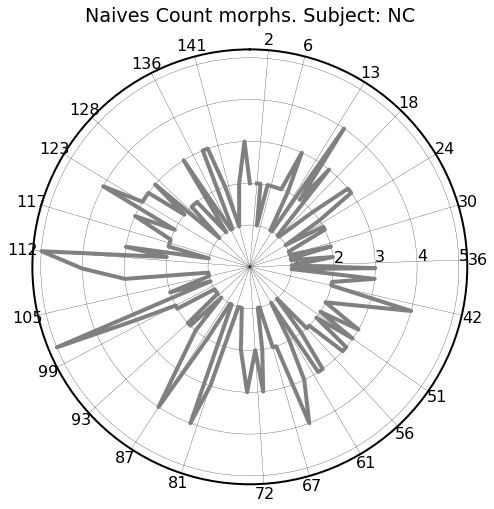

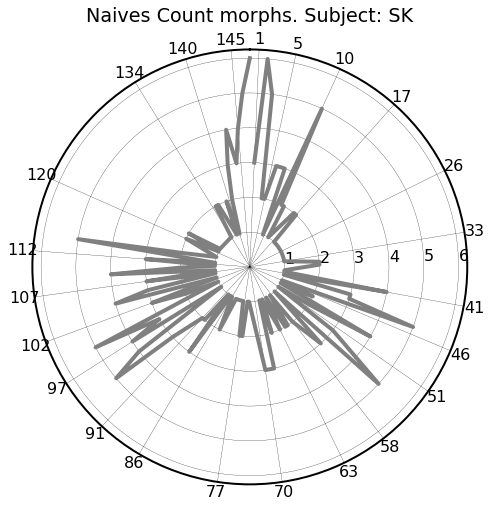

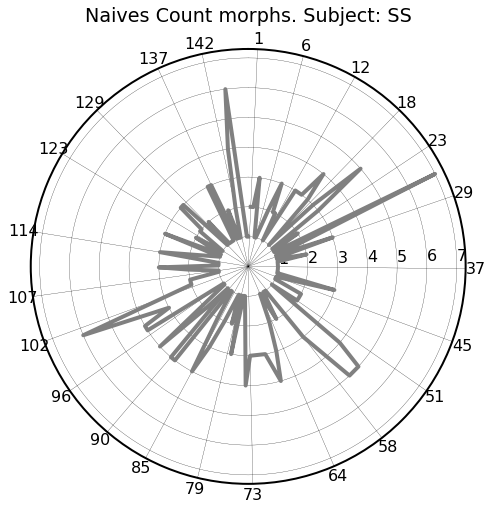

In [54]:
for subject in alldata.SUBJECT.unique():
    
    ### step 1
    subjectdata = alldata[alldata['SUBJECT'] == subject]
    count_morphs = subjectdata.groupby('shifted_morphID').size().to_frame('size').reset_index()
    
    ### step 2
    theta = []
    for deg in count_morphs.shifted_morphID.unique():
        theta.append(np.pi / 73.5 * deg)
    label_stimuluss = [str(i) for i in count_morphs['shifted_morphID'].astype('int')]

    # x = np.arange(0, len(theta), step =10)
    x = np.arange(4, len(theta), step=5)
    x = np.insert(x, 0, 0)
    new_ticks = list()
    new_label_stimuluss = list()

    for i in x:
        new_ticks.append(theta[i])
        new_label_stimuluss.append(label_stimuluss[i])

    ### step 3
    
    # create figure
    plt.figure(figsize=(8, 8))
    ax = plt.axes(polar=True)
    df= count_morphs[['size']]
    df_reset_index = df.reset_index(drop=True)
    df.index = [theta[location] for location in df.index]
    df.plot(ax=ax, lw=4, color=['grey'])

    # ax.fill_between(np.asarray(theta), np.asarray(df_reset_index['size'] - df_size['size_SEM'], dtype='float'), 
    #                 np.asarray(df_reset_index['size'] + df_size['size_SEM'], dtype='float'), color='gray', alpha=0.3)
    ax.set_theta_zero_location("N")
    ax.set_xticks(new_ticks)
    ax.set_xticklabels(labels=new_label_stimuluss)

    # plt.thetagrids(np.arange(0, 360, 60), labels=new_label_stimuluss)
    plt.grid(color='black', linewidth=0.25)
    # plt.ylim([0, 25])
    ax.set_facecolor('white')
    ax.set_theta_direction(-1)
    ax.get_legend().remove()
    ax.set_rlabel_position(89)
    # ax.set_yticks(np.arange(0, 25, step=5))
    plt.title('Naives Count morphs. Subject: ' + subject)
    plt.savefig(subject + '_count_morphs.eps', dpi=3000)
    plt.savefig(subject + '_count_morphs.pdf', format='pdf', dpi=3000)

    plt.show()